In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from urllib.parse import urlparse
import matplotlib.pyplot as plt

In [3]:
filepath = '/Users/qian/Desktop/DATA/PassionPorject/history.csv'
df = pd.read_csv(filepath)
df.head()

,order,id,date,time,title,url,visitCount,typedCount,transition
0,0,27694,8/20/2024,11:03:21,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending&se...,2,0,link
1,1,27694,8/20/2024,11:03:20,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending&se...,2,0,link
2,2,27693,8/20/2024,11:03:17,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending&se...,1,0,link
3,3,27692,8/20/2024,11:03:14,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending&se...,1,0,link
4,4,27682,8/20/2024,11:03:11,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending,3,0,link


|column||
|--|--|
|order |Likely the sequence of the entries.|
|id |A unique identifier for each entry.|
|date|The date of the visit.|
|time |The time of the visit.|
|title |The title of the webpage.|
|url |The URL of the webpage.|
|visitCount |How many times this URL has been visited.|
|typedCount |How many times this URL has been typed in directly.|
|transition |Describes how the user navigated to this page (e.g., link click, typed URL).|

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38338 entries, 0 to 38337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       38338 non-null  int64 
 1   id          38338 non-null  int64 
 2   date        38338 non-null  object
 3   time        38338 non-null  object
 4   title       38181 non-null  object
 5   url         38338 non-null  object
 6   visitCount  38338 non-null  int64 
 7   typedCount  38338 non-null  int64 
 8   transition  38338 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.6+ MB


In [5]:
df.describe()

,order,id,visitCount,typedCount
count,38338.000000,38338.000000,38338.000000,38338.000000
mean,19168.500000,14796.445850,35.452867,3.005452
std,11067.371647,8929.436307,95.574067,26.067405
min,0.000000,2.000000,0.000000,0.000000
25%,9584.250000,3740.250000,1.000000,0.000000
50%,19168.500000,16931.000000,3.000000,0.000000
75%,28752.750000,21722.000000,14.000000,0.000000
max,38337.000000,27694.000000,527.000000,284.000000


In [6]:
df.isna().sum()

order           0
id              0
date            0
time            0
title         157
url             0
visitCount      0
typedCount      0
transition      0
dtype: int64

In [7]:
#To know what are those null title website, adjust is valueble or not
df[df['title'].isnull()].to_csv('title_is_null.csv')

In [8]:
df.sort_values(by='visitCount',ascending=False).head(10)

,order,id,date,time,title,url,visitCount,typedCount,transition
11995,11995,639,7/29/2024,8:39:41,CITATS928,https://github.com/CITATS928,527,0,link
2442,2442,639,8/14/2024,7:35:46,CITATS928,https://github.com/CITATS928,527,0,link
28617,28617,639,6/28/2024,15:23:46,CITATS928,https://github.com/CITATS928,527,0,link
6398,6398,639,8/5/2024,22:13:27,CITATS928,https://github.com/CITATS928,527,0,link
6399,6399,639,8/5/2024,22:13:27,CITATS928,https://github.com/CITATS928,527,0,link
6403,6403,639,8/5/2024,22:13:09,CITATS928,https://github.com/CITATS928,527,0,link
6404,6404,639,8/5/2024,22:12:58,CITATS928,https://github.com/CITATS928,527,0,link
6405,6405,639,8/5/2024,22:12:57,CITATS928,https://github.com/CITATS928,527,0,link
6406,6406,639,8/5/2024,22:12:57,CITATS928,https://github.com/CITATS928,527,0,link
23714,23714,639,7/8/2024,7:40:55,CITATS928,https://github.com/CITATS928,527,0,reload


In [9]:
# Count the occurrences of each URL and display the top 10 most visited URLs with their counts
url_counts = df['url'].value_counts()
url_counts.head(20)




url
https://github.com/CITATS928                                           562
https://github.com/CITATS928?tab=repositories                          483
https://translate.google.com/                                          307
https://translate.google.com/?sl=auto&tl=zh-CN&op=translate            296
https://github.com/CITATS928/ScientificCalculator                      285
https://chatgpt.com/                                                   256
https://school.zipcode.rocks/labs                                      227
https://github.com/QueueTTP/CircusCircus                               185
https://www.bilibili.com/                                              151
https://github.com/                                                    149
https://login.microsoftonline.com/common/login                         141
https://school.zipcode.rocks/calendar                                  136
https://school.zipcode.rocks/                                          126
https://translate.goo

In [10]:
# Count most visited domain
df['domain'] = df['url'].apply(lambda x: urlparse(x).netloc)
domain_counts = df['domain'].value_counts()
domain_counts.head(20)

domain
github.com                          8537
www.google.com                      5045
translate.google.com                4857
outlook.office365.com               2134
www.bilibili.com                    1334
docs.google.com                     1042
school.zipcode.rocks                 950
www.linkedin.com                     786
chatgpt.com                          761
zipcodecore.github.io                725
replit.com                           614
login.microsoftonline.com            536
drive.google.com                     521
localhost:8888                       452
us-east-1.console.aws.amazon.com     446
accounts.google.com                  345
127.0.0.1:5000                       339
app.slack.com                        319
ceac.state.gov                       268
raid.report                          249
Name: count, dtype: int64

In [11]:
# What's in the transition
df['transition'].unique()

array(['link', 'auto_toplevel', 'reload', 'typed', 'form_submit',
       'generated', 'auto_bookmark', 'manual_subframe'], dtype=object)

In [12]:
df['transition'].value_counts()

transition
link               33033
form_submit         1551
reload              1346
generated           1145
typed                734
auto_toplevel        485
auto_bookmark         43
manual_subframe        1
Name: count, dtype: int64

In [13]:
df[df['transition']=='typed']

,order,id,date,time,title,url,visitCount,typedCount,transition,domain
136,136,160,8/20/2024,8:39:31,Google 翻译,https://translate.google.com/,307,284,typed,translate.google.com
152,152,160,8/20/2024,8:38:25,Google 翻译,https://translate.google.com/,307,284,typed,translate.google.com
154,154,161,8/20/2024,8:29:12,哔哩哔哩 (゜-゜)つロ 干杯~-bilibili,https://www.bilibili.com/,88,84,typed,www.bilibili.com
269,269,160,8/19/2024,22:38:46,Google 翻译,https://translate.google.com/,307,284,typed,translate.google.com
326,326,1205,8/19/2024,15:04:52,ChatGPT,https://chatgpt.com/,247,0,typed,chatgpt.com
...,...,...,...,...,...,...,...,...,...,...
37993,37993,160,5/24/2024,15:35:52,Google 翻译,https://translate.google.com/,307,284,typed,translate.google.com
37994,37994,34,5/24/2024,15:32:52,Where is Xur? Find Him here and See What He's ...,https://whereisxur.com/,6,5,typed,whereisxur.com
38015,38015,2521,5/23/2024,23:51:37,小秋秋灬 - Twitch,https://www.twitch.tv/520shoei1314,6,3,typed,www.twitch.tv
38041,38041,161,5/23/2024,23:25:35,哔哩哔哩 (゜-゜)つロ 干杯~-bilibili,https://www.bilibili.com/,88,84,typed,www.bilibili.com


In [14]:
df[['title', 'url', 'typedCount']].sort_values(by='typedCount',ascending=False,).drop_duplicates(subset='url').head(10)

,title,url,typedCount
36959,Google 翻译,https://translate.google.com/,284
37928,哔哩哔哩 (゜-゜)つロ 干杯~-bilibili,https://www.bilibili.com/,84
14221,我的云端硬盘 - Google 云端硬盘,https://drive.google.com/drive/my-drive,65
1238,GitHub,https://github.com/,28
12265,(14) Top job picks for you | LinkedIn,https://www.linkedin.com/jobs/collections/reco...,21
35569,Google 翻译,https://translate.google.com/?sl=auto&tl=zh-CN...,7
21534,Select a Date & Time - Calendly,https://calendly.com/danstabb/prodev,6
37854,DIM - 背包,https://app.destinyitemmanager.com/46116860184...,5
37994,Where is Xur? Find Him here and See What He's ...,https://whereisxur.com/,5
20008,www.tangrenjie.one,https://www.tangrenjie.one/,5


In [15]:
#when browse the most

df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
# ignore mins and convert to day
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df

,order,id,date,time,title,url,visitCount,typedCount,transition,domain,datetime,hour,day_of_week
0,0,27694,8/20/2024,11:03:21,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending&se...,2,0,link,huggingface.co,2024-08-20 11:03:21,11,Tuesday
1,1,27694,8/20/2024,11:03:20,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending&se...,2,0,link,huggingface.co,2024-08-20 11:03:20,11,Tuesday
2,2,27693,8/20/2024,11:03:17,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending&se...,1,0,link,huggingface.co,2024-08-20 11:03:17,11,Tuesday
3,3,27692,8/20/2024,11:03:14,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending&se...,1,0,link,huggingface.co,2024-08-20 11:03:14,11,Tuesday
4,4,27682,8/20/2024,11:03:11,模型 - 抱脸 --- Models - Hugging Face,https://huggingface.co/models?sort=trending,3,0,link,huggingface.co,2024-08-20 11:03:11,11,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38333,38333,4482,5/22/2024,12:18:27,surges - Google Search,https://www.google.com/search?sca_esv=0f432c47...,2,0,link,www.google.com,2024-05-22 12:18:27,12,Wednesday
38334,38334,4483,5/22/2024,12:18:26,surges - Google Search,https://www.google.com/search?sca_esv=0f432c47...,2,0,link,www.google.com,2024-05-22 12:18:26,12,Wednesday
38335,38335,4483,5/22/2024,12:18:26,surges - Google Search,https://www.google.com/search?sca_esv=0f432c47...,2,0,link,www.google.com,2024-05-22 12:18:26,12,Wednesday
38336,38336,4484,5/22/2024,12:18:24,surges - Google Search,https://www.google.com/search?q=surges&rlz=1C1...,2,0,link,www.google.com,2024-05-22 12:18:24,12,Wednesday


In [16]:
hourly_activity = df.groupby('hour').size()
hourly_activity = hourly_activity.sort_index()
hourly_activity

hour
0      851
1      294
2       51
3       28
4      120
5       48
6       68
7     1757
8     2397
9     1611
10    2500
11    2775
12    1439
13    3201
14    2354
15    3639
16    3199
17    2035
18     796
19    1019
20    1764
21    2736
22    2347
23    1309
dtype: int64

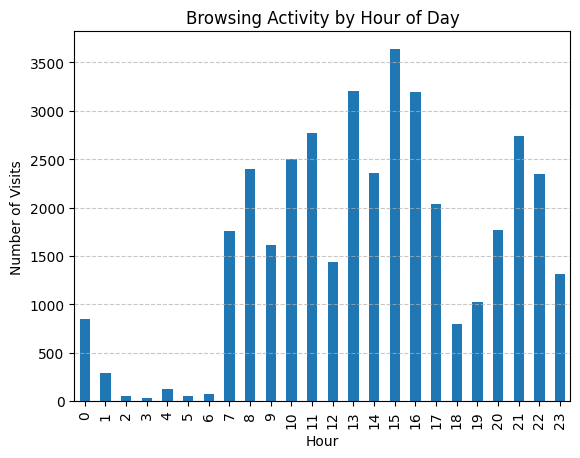

In [17]:
hourly_activity.plot(kind='bar')
plt.title('Browsing Activity by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Visits')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [18]:
daily_activity = df.groupby('day_of_week').size()
daily_activity = daily_activity.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daily_activity


day_of_week
Monday       8184
Tuesday      5980
Wednesday    6861
Thursday     5159
Friday       5474
Saturday     3004
Sunday       3676
dtype: int64

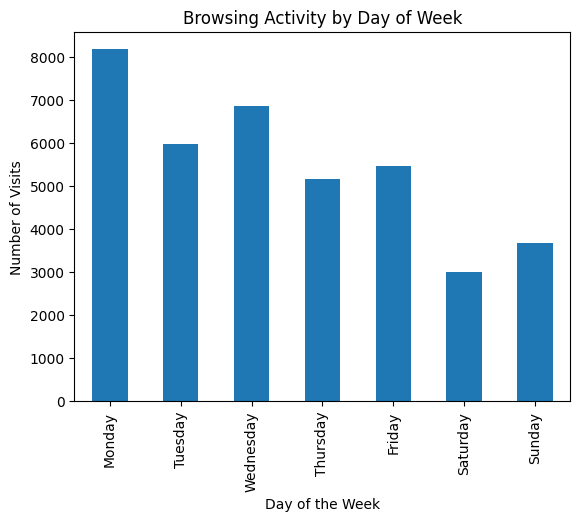

In [19]:
daily_activity.plot(kind='bar')
plt.title('Browsing Activity by Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Visits')
plt.show()